# 실전문제 4. 미로 탈출
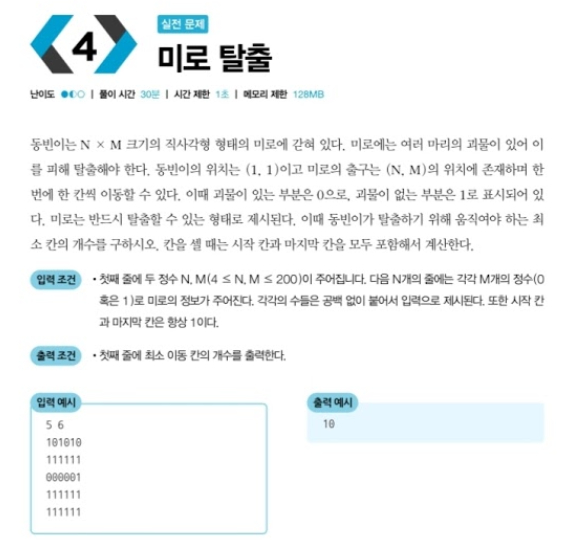

## 실패1. DFS
- `핵심 포인트`: 방문 여부를 기록하기 위한 행렬 생성
    - 방문했던 1을 거쳐갈 때 거쳐간 노드의 수를 증가시키지 않아야 한다.
    - 거쳐갔던 1 숫자가 변하므로 방문했음을 입력받은 그래프로부터 바로 확인하기 위한 방법이 떠오르지 않는다.
    - 따라서, 그래프와 동일한 형태의 (행과 열) visited_graph를 생성한다.
    - visited_graph의 원소는 모두 0으로 초기화시키며 방문했을 때 그 노드의 원소를 1로 바꾼다.
    - 코드 구현
    > ```python
    visited_graph = [[0] * col for _ in range(row)]
    '''
    코드 생략
    '''
    >if graph[x][y] == 1 and visited_graph[x][y] == 0:
        visited_graph[x][y] = 1
    ```

In [7]:
row, col = map(int, input().split())
    visited_graph = [[0] * col for _ in range(row)]
    >if graph[x][y] == 1 and visited_graph[x][y] == 0:

graph = []
for _ in range(row):
    graph.append(list(map(int, input())))
    
visited_graph = [[0] * col for _ in range(row)]
print('visited_graph', visited_graph)
    
# 재귀함수로 dfs 만들어볼까?
count = 0 
def dfs(x, y):
    global count
    if x <= -1 or x >= row or y <= -1 or y >= col:
        return
    # 괴물이 없는 부분인 동시에 아직 방문하지 않은 곳
    if graph[x][y] == 1 and visited_graph[x][y] == 0:
        # 방문처리
        visited_graph[x][y] = 1
        graph[x][y] += count
        print('visited_graph', visited_graph)
        print('graph',graph)
        print()
        count += 1
        dfs(x-1, y)
        dfs(x, y-1)
        dfs(x+1, y)
        dfs(x, y+1)
    
dfs(0, 0)    
print('final_graph', graph)
        

5 6
101010
111111
000001
111111
111111
visited_graph [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
visited_graph [[1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
graph [[1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]

visited_graph [[1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
graph [[1, 0, 1, 0, 1, 0], [2, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]

visited_graph [[1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
graph [[1, 0, 1, 0, 1, 0], [2, 3, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]

visited_graph [[1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
graph [[1, 0, 1, 0, 1, 0], [2, 3, 4, 1, 1, 1], [0, 0, 0, 0, 0,

## 성공 1: 재귀함수를 이용한 BFS
- `DFS를 이용한 풀이가 실패한 이유`: 최단 경로가 아닌 곳을 들렸다가 올 때 숫자가 올라가므로 최단 경로가 거치는 1의 수를 추적하기보다 결론적으로 그래프에 있는 1의 총 개수를 추적하게 된다.
- `추가적으로 생각해볼 수 있는 점`: 만약 최단거리를 구하는 것이 아닌 모든 1을 방문하는 것이 목적이라면, dfs를 활용한 위의 코드도 적합하다.
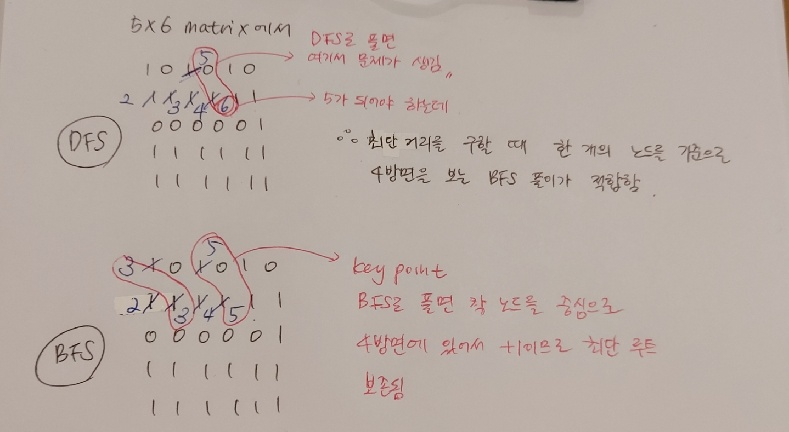


In [3]:
row, col = map(int, input().split())

graph = []
for _ in range(row):
    graph.append(list(map(int, input())))
    
# 재귀함수를 사용한 bfs
def bfs(x, y):
    dx = [-1, 1, 0, 0]
    dy = [0, 0, -1, 1]
    # 주어진 방향을 벗어나는 경우 즉시 종료
    if x <= -1 or x >= row or y <= -1 or y >= col:
        return
    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]
        if -1 < nx < row and -1 < ny < col and graph[nx][ny] == 1:
            graph[nx][ny] = graph[x][y] + 1
            print(graph)
            bfs(nx, ny)
    return graph[row-1][col-1]

bfs(0, 0)

print(graph)
print(bfs(0, 0))

5 6
101010
111111
000001
111111
111111
[[1, 0, 1, 0, 1, 0], [2, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 1, 0, 1, 0], [2, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 1, 0, 1, 0], [2, 3, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 1, 0, 1, 0], [2, 3, 4, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 1, 0], [2, 3, 4, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 1, 0], [2, 3, 4, 5, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 1, 0], [2, 3, 4, 5, 6, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 7, 0], [2, 3, 4, 5, 6, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 7, 0], [2, 3, 4, 5, 6, 7], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 7, 0], [2, 3, 4, 5, 6, 7], [0, 0, 0, 0

- `성능 개선`: 재귀함수를 이용한 BFS로도 문제가 풀렸지만 `메모리 소모`가 심하다. 
    - 따라서, 재귀함수가 아닌 큐를 활용해서 BFS를 구현해보자!

## 성공 2: 큐를 이용한 BFS

In [4]:
from collections import deque

# row, col을 공백으로 구분하여 입력받기
row, col = map(int, input().split())

# 2차원 리스트의 맵 정보 입력받기
graph = []
for _ in range(row):
    graph.append(list(map(int, input())))
    
# 이동할 네 방향 정의(상, 하, 좌, 우)
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# BFS
def bfs(x, y):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque()
    queue.append((x, y))
    while queue:
        x, y = queue.popleft()
        # 현재 위치에서부터 4 방향 확인
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            ## 새로운 지점에서
            # 미로 찾기 공간을 벗어난 경우 무시
            if nx <= -1 or nx >= row or ny <= -1 or ny >= col:
                continue
            # 해당 노드를 처음 방문하는 경우에만 최단 거리 기록
            if graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
                print(graph)
    # 가장 오른쪽까지의 최단 거리 반환
    return graph[row-1][col-1]

# BFS를 수행한 결과 출력
print(graph)
print(bfs(0, 0))

5 6
101010
111111
000001
111111
111111
[[1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[1, 0, 1, 0, 1, 0], [2, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 1, 0, 1, 0], [2, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 1, 0, 1, 0], [2, 3, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 1, 0, 1, 0], [2, 3, 4, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 1, 0], [2, 3, 4, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 1, 0], [2, 3, 4, 5, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 1, 0], [2, 3, 4, 5, 6, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 7, 0], [2, 3, 4, 5, 6, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
[[3, 0, 5, 0, 7, 0], [2, 3, 4, 5, 6, 7], [0, 0, 0, 0

- `메모`: 최단 경로 문제를 BFS 탐색으로 푼다면, 기준 노드를 중심으로 4가지 방향을 탐색하기 때문에 방문했던 노드를 재방문하게 된다.       
    - 예) graph[0][0] = 3
    - 하지만 그럼에도 불구하고 최종 노드(graph[row-1][col-1])의 값은 최단 거리를 나타내기 때문에 적합한 풀이다.
    - 만약 방문했던 노드의 수를 증가시키지 않으려면, 맨 위의 DFS 탐색에서 사용했던 방문처리 행렬(visited_graph)를 만들어주면 된다.
## 추가적인 생각: 방문했던 노드의 수를 증가시키지 않게 하기 위한 방법

In [11]:
from collections import deque

# row, col을 공백으로 구분하여 입력받기
row, col = map(int, input().split())

# 2차원 리스트의 맵 정보 입력받기
graph = []
for _ in range(row):
    graph.append(list(map(int, input())))
    
visited_graph = [[0] * col for _ in range(row)]
print('visited_graph', visited_graph)
    
# 이동할 네 방향 정의(상, 하, 좌, 우)
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

# BFS
def bfs(x, y):
    # 큐(Queue) 구현을 위해 deque 라이브러리 사용
    queue = deque()
    queue.append((x, y))
    while queue:
        x, y = queue.popleft()
        visited_graph[x][y] = 1
        # 현재 위치에서부터 4 방향 확인
        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]
            ## 새로운 지점에서
            # 미로 찾기 공간을 벗어난 경우 무시
            if nx <= -1 or nx >= row or ny <= -1 or ny >= col:
                continue
            # 해당 노드를 처음 방문하는 경우에만 최단 거리 기록
            if graph[nx][ny] == 1 and visited_graph[nx][ny] == 0:
                visited_graph[nx][ny] = 1
                graph[nx][ny] = graph[x][y] + 1
                queue.append((nx, ny))
                print('graph', graph)
                print('visited_graph', visited_graph)
    # 가장 오른쪽까지의 최단 거리 반환
    return graph[row-1][col-1]

# BFS를 수행한 결과 출력
print(graph)
print(bfs(0, 0))

5 6
101010
111111
000001
111111
111111
visited_graph [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
[[1, 0, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
graph [[1, 0, 1, 0, 1, 0], [2, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
visited_graph [[1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
graph [[1, 0, 1, 0, 1, 0], [2, 3, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
visited_graph [[1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
graph [[1, 0, 1, 0, 1, 0], [2, 3, 4, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]
visited_graph [[1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]
graph [[1, 0, 5, 0, 1, 0], [2, 3, 4, 1, 1, 1], [0, 0, 0, 0, 0, 1], [1, 1, 1, 1,